### IMPORTS

In [69]:
import sys
import os
sys.executable

'c:\\Users\\luisb\\AppData\\Local\\Programs\\Python\\Python312\\python.exe'

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
SAVE_PATH = "../saves/"

In [72]:
def get_pareto(arr):
    # Convert the array to a numpy array
    arr_np = np.array(arr)

    # Initialize a boolean mask to keep track of pareto-efficient elements
    is_pareto_efficient = np.ones(arr_np.shape[0], dtype=bool)

    for i in range(arr_np.shape[0]):
        if is_pareto_efficient[i]:
            for j in range(arr_np.shape[0]):
                if j != i and is_pareto_efficient[j]:
                    # Check if arr[i] dominates arr[j] in all dimensions
                    if np.all(arr_np[i] <= arr_np[j]) and np.any(arr_np[i] < arr_np[j]):
                        is_pareto_efficient[j] = False

    # Return the pareto-efficient elements
    return is_pareto_efficient
    

In [73]:
savefiles = [file for file in os.listdir(SAVE_PATH) if file != "pareto.csv"] 
savefiles

['saves_1710424156961.csv',
 'saves_1710424454746.csv',
 'saves_1710424515049.csv',
 'saves_1710424637019.csv',
 'saves_1710424916129.csv',
 'saves_1710429089587.csv',
 'saves_1710429514728.csv',
 'saves_1710429727788.csv',
 'saves_1710429865873.csv',
 'saves_1710429985239.csv',
 'saves_1710430130919.csv',
 'saves_1710430150347.csv',
 'saves_1710430307672.csv',
 'saves_1710430871920.csv',
 'saves_1710431208782.csv',
 'saves_1710433005888.csv',
 'saves_1710433038829.csv',
 'saves_1710433067539.csv',
 'saves_1710433104086.csv',
 'saves_1710433145786.csv',
 'saves_1710433231572.csv',
 'saves_1710433284422.csv',
 'saves_1710433317750.csv',
 'saves_1710433333342.csv',
 'saves_1710433396034.csv',
 'saves_1710433430620.csv',
 'saves_1710433540895.csv',
 'saves_1710433601737.csv',
 'saves_1710433642142.csv',
 'saves_1710433666142.csv',
 'saves_1710433698580.csv',
 'saves_1710433876094.csv',
 'saves_1710436421269.csv',
 'saves_1710436501194.csv',
 'saves_1710437276237.csv',
 'saves_171043733861

### VISUALIZATION

In [74]:
pareto = pd.read_csv(SAVE_PATH+'pareto.csv', sep=';')
pareto

,utilA,utilB,utilSum,contract,pareto
0,2342,7558,9900,"[146,114,64,79,185,54,52,25,98,3,120,178,118,4...",True
1,2235,7668,9903,"[146,114,64,79,185,62,98,25,115,78,120,178,118...",True
2,2361,7551,9912,"[34,114,64,79,185,54,52,25,98,3,120,178,118,48...",True
3,2384,7545,9929,"[146,114,64,79,185,54,52,199,3,98,120,178,118,...",True
4,2297,7636,9933,"[146,114,64,79,185,54,25,52,61,115,120,178,118...",True
...,...,...,...,...,...
214,9488,6542,16030,"[73,174,67,36,149,152,59,57,3,136,163,86,12,18...",True
215,9539,6541,16080,"[50,174,67,36,149,152,59,57,3,136,163,86,12,18...",True
216,9605,6539,16144,"[73,174,23,136,149,152,59,57,3,36,163,86,12,18...",True
217,9656,6538,16194,"[50,174,23,136,149,152,59,57,3,36,163,86,12,18...",True


In [75]:
for savefile in savefiles:
    contracts = pd.read_csv(SAVE_PATH + savefile, sep=';')
    if "pareto" not in contracts.columns:
        contracts["pareto"] = get_pareto(contracts[["utilA","utilB"]])
        contracts = contracts.sort_values(by="utilSum", ascending=False).drop_duplicates()
        contracts.to_csv(SAVE_PATH+savefile, sep=';', index=False)
    pareto = pd.concat([pareto, contracts[contracts["pareto"]]])
pareto = pareto.sort_values(by="utilSum", ascending=False).drop_duplicates()
pareto["pareto"] = get_pareto(pareto[["utilA","utilB"]])
pareto = pareto[pareto["pareto"]].sort_values(by="utilSum", ascending=True)
pareto.to_csv(SAVE_PATH+'pareto.csv', sep=';', index=False)
pareto

,utilA,utilB,utilSum,contract,pareto,index
9902,2094,7297,9391,"[50,172,12,22,26,178,147,3,2,130,84,117,77,112...",True,9903.0
9905,2075,7317,9392,"[50,172,12,22,26,178,147,3,2,130,84,117,77,112...",True,9906.0
9898,2119,7276,9395,"[50,172,12,22,26,93,147,3,2,130,84,117,77,112,...",True,9899.0
9899,2104,7291,9395,"[50,172,12,22,26,178,147,3,2,130,84,117,77,112...",True,9900.0
9895,2112,7286,9398,"[50,172,12,22,26,93,147,3,2,130,84,117,77,112,...",True,9896.0
...,...,...,...,...,...,...
1369,9440,6531,15971,"[73,174,23,136,149,80,59,57,132,75,163,86,151,...",True,1370.0
1346,9491,6530,16021,"[50,174,23,136,149,80,59,57,132,75,163,86,151,...",True,1347.0
1099,9737,6529,16266,"[73,174,23,136,149,18,59,57,132,152,163,86,12,...",True,1100.0
958,9780,6528,16308,"[73,174,23,136,149,36,59,57,132,152,163,86,12,...",True,959.0


(1001.55, 10251.45, 6395.75, 9283.25)

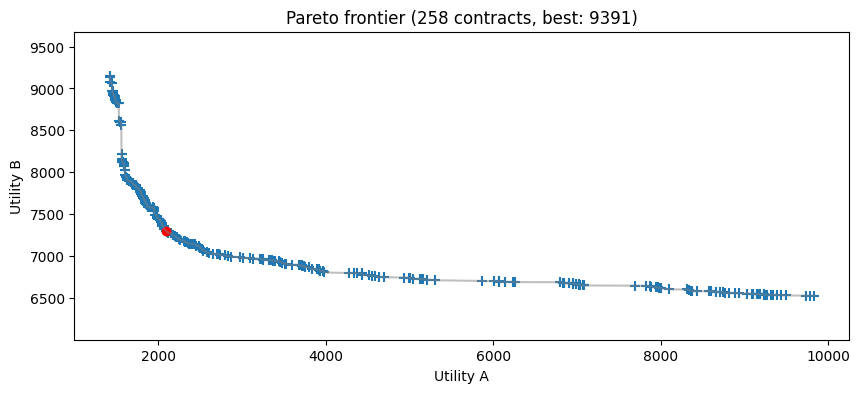

In [76]:
pareto = pareto.sort_values(by="utilA", ascending=True)
best_util = pareto.sort_values(by="utilSum").iloc[0]
plt.figure(figsize=(10,4))
plt.title(f"Pareto frontier ({len(pareto)} contracts, best: {best_util['utilSum']})")
plt.plot(pareto["utilA"], pareto["utilB"], color='gray', linestyle='-', alpha=0.5)
plt.scatter(pareto["utilA"], pareto["utilB"], s=50, marker="+")
plt.scatter(best_util["utilA"], best_util["utilB"], marker="o", color="red")
plt.xlabel("Utility A")
plt.ylabel("Utility B")
plt.axis("equal")

In [77]:
pareto.shape

(258, 6)